Simple test of kmeans sample.

In [1]:
%matplotlib inline

In [2]:
from kmeans_radec import kmeans_sample, KMeans
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_randoms_radec(minra, maxra, mindec, maxdec, N, raoffset=0):
    r = 1.0
    # this z is not redshift!
    zmin = r * np.sin(np.pi * mindec / 180.)
    zmax = r * np.sin(np.pi * maxdec / 180.)

    phimin = np.pi / 180. * (minra - 180 + raoffset)
    phimax = np.pi / 180. * (maxra - 180 + raoffset)

    # generate ra and dec
    z_coord = np.random.uniform(zmin, zmax, N)  # not redshift!
    phi = np.random.uniform(phimin, phimax, N)
    dec_rad = np.arcsin(z_coord / r)

    # convert to ra and dec
    random_ra = phi * 180 / np.pi + 180 - raoffset
    random_dec = dec_rad * 180 / np.pi
    
    return random_ra, random_dec

In [4]:
def plot_centers(centers, x_min=0, x_max=360, y_min=-180, y_max=180, h=1):
    km = KMeans(centers)
    # h is Step size of the mesh. Decrease to increase the quality of the VQ.

    # Plot the decision boundary. For that, we will assign a color to each
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = km.find_nearest(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    zz = Z.reshape(xx.shape)

    number = np.arange(len(centers))
    plt.pcolor(xx, yy, zz)
    for ith, center in enumerate(centers):
        plt.text(center[0], center[1], ith, color='white', fontsize=15)

X (200, 2)  centers (10, 2)  tol=1e-05  maxiter=100
19 iterations  cluster sizes: [13 22 19 21 11 21 22 22 27 22]
X (10000, 2)  centers (10, 2)  tol=1e-05  maxiter=100
20 iterations  cluster sizes: [ 865 1114  949  977 1089  960  996 1030 1189  831]
[[ 61.40916282  -2.57945628]
 [ 53.06491093   6.62482142]
 [ 59.18661908  -7.29534662]
 [ 52.98729071  -6.44345052]
 [ 66.75303243  -6.76816226]
 [ 67.12594153   0.4018939 ]
 [ 60.55773984   2.71374727]
 [ 66.80452795   6.89821192]
 [ 53.87387108  -0.08427612]
 [ 59.62056037   7.6625213 ]]


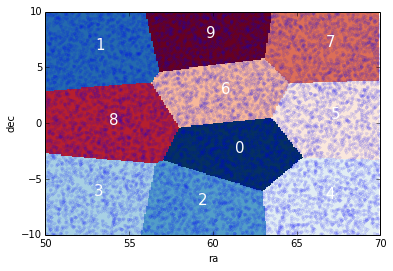

In [5]:
# first sample points that do not cross over ra=360
minra = 50
maxra = 70
mindec = -10
maxdec = 10
N = 10000
raoffset = 0
ncen = 10
h = 0.1

ra, dec = generate_randoms_radec(minra, maxra, mindec, maxdec, N, raoffset)
plt.plot(ra, dec, '.', alpha=0.1)
plt.xlabel('ra')
plt.ylabel('dec')
X = np.vstack((ra, dec)).T
km = kmeans_sample(X, ncen)
plot_centers(km.centers, minra, maxra, mindec, maxdec, h)
print(km.centers)

-10 10
X (200, 2)  centers (10, 2)  tol=1e-05  maxiter=100
13 iterations  cluster sizes: [17 30 19 16 16 18 20 27 16 21]
X (10000, 2)  centers (10, 2)  tol=1e-05  maxiter=100
44 iterations  cluster sizes: [1043 1125  900 1036  952 1129  939 1046  995  835]
[[  3.52955126e+02  -2.73813949e-01]
 [  3.53604791e+02   6.85580145e+00]
 [  3.58369660e+02   1.64562982e+00]
 [  6.95379352e+00   7.76533556e-01]
 [  3.53102003e+02  -6.77608766e+00]
 [  6.65549151e+00  -6.84855574e+00]
 [  6.99203058e+00   6.98042751e+00]
 [  3.59124711e+02  -6.90192707e+00]
 [  9.59501031e-01   6.79867759e+00]
 [  2.36799421e+00  -2.53441019e+00]]


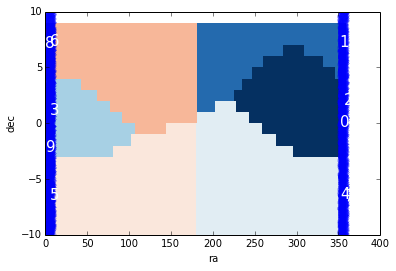

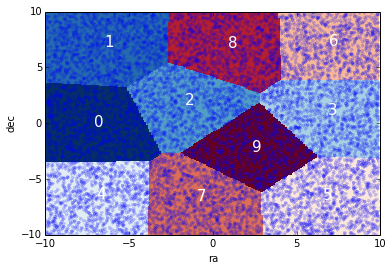

In [6]:
# now sample ones that do cross over the zero line
# first sample points that do not cross over ra=360
minra = 350 
maxra = 370
mindec = -10
maxdec = 10
N = 10000
raoffset = -180
ncen = 10
h = 0.1

phimin = (minra - 180 + raoffset)
phimax = (maxra - 180 + raoffset)
print(phimin, phimax)

ra, dec = generate_randoms_radec(minra, maxra, mindec, maxdec, N, raoffset)
ra = np.where(ra > 360, ra - 360, ra)
plt.plot(ra, dec, '.', alpha=0.2)
plt.xlabel('ra')
plt.ylabel('dec')
X = np.vstack((ra, dec)).T
km = kmeans_sample(X, ncen)
plot_centers(km.centers, 0, 360, mindec, maxdec, 10 * h)
print(km.centers)

# make rotated figure
plt.figure()
centers = km.centers.copy()
centers[:,0] = np.where(centers[:,0] > 180, centers[:,0] - 360, centers[:,0])
ra = np.where(ra > 180, ra - 360, ra)
plt.plot(ra, dec, '.', alpha=0.2)
plt.xlabel('ra')
plt.ylabel('dec')
plot_centers(centers, minra - 360, maxra - 360, mindec, maxdec, h)